#**Baseline Model CNN**

###📥 **Import Libraries**

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

# common library
import os
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# tensor computation
from tensorflow.random import set_seed
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import plot_model
from keras.models import Model, load_model

Mounted at /content/drive


###🔒 **Inisialisasi Bilangan Random**

In [ ]:
def set_random(seed):
  np.random.seed(seed)
  set_seed(seed)

set_random(2022)

###📚 **Data Preparation**

In [ ]:
# file directory
file_dir = '/content/drive/Shareddrives/Teman Tapi Mining/Satria Data/2022/'
data_dir = 'data/Garbage classification/Garbage classification/'
dir = file_dir + data_dir

# define classes 
class_ = os.listdir(dir)
class_

['metal', 'cardboard', 'glass', 'trash', 'paper', 'plastic']

###📊 **Exploratory Data Analysis**

In [ ]:
# define plot function
def img_plot(item_dir):
  plt.figure(figsize = (10, 10))
  for index, img_dir in enumerate ([os.path.join(item_dir, file) for file in os.listdir(item_dir)[:5]]):
    plt.subplot(5, 5, index + 1)
    plt.tight_layout()
    plt.imshow(plt.imread(img_dir))

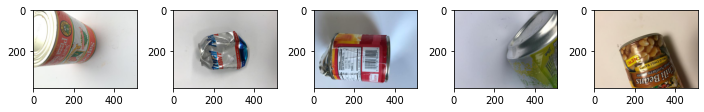

In [ ]:
img_plot(dir + 'metal')

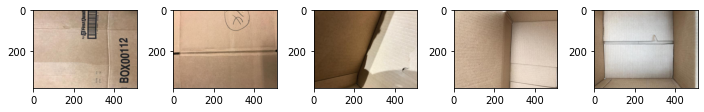

In [ ]:
img_plot(dir + 'cardboard')

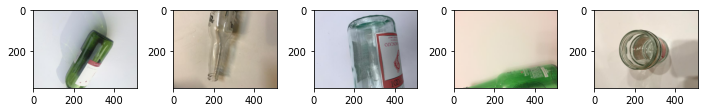

In [ ]:
img_plot(dir + 'glass')

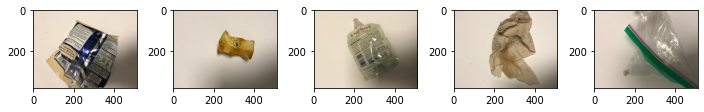

In [ ]:
img_plot(dir + 'trash')

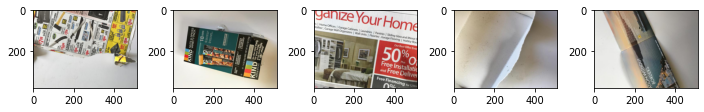

In [ ]:
img_plot(dir + 'paper')

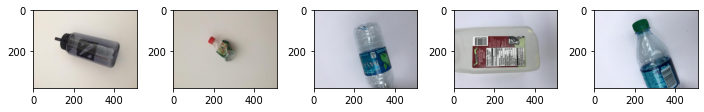

In [ ]:
img_plot(dir + 'plastic')

###🪆 **Data Augmentation**

In [ ]:
# train generator
train = ImageDataGenerator(
    horizontal_flip = True, vertical_flip = True,
    validation_split = 0.1, rescale = 1./255,
    shear_range = 0.1, zoom_range = 0.1,
    width_shift_range = 0.1, height_shift_range = 0.1
    )
train_generator = train.flow_from_directory(
    dir, target_size = (512, 384), batch_size = 32,
    class_mode = 'categorical', subset = 'training'
    )

# test generator
test = ImageDataGenerator(rescale = 1./255, validation_split = 0.1)
test_generator = test.flow_from_directory(
    dir, target_size = (512, 384), batch_size = 32,
    class_mode = 'categorical', subset = 'validation'
    )

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


###🎯 **Modeling**

In [ ]:
inputs = Input(shape = (512, 384, 3))
layers = Conv2D(32, (3, 3), activation = 'relu', input_shape = (512, 384, 3))(inputs)
layers = MaxPooling2D(2, 2)(layers)
layers = Conv2D(64, (3, 3), activation = 'relu')(layers)
layers = MaxPooling2D(2, 2)(layers)
layers = Conv2D(128, (3, 3), activation = 'relu')(layers)
layers = MaxPooling2D(2, 2)(layers)
layers = Conv2D(128, (3, 3), activation = 'relu')(layers)
layers = MaxPooling2D(2, 2)(layers)
layers = Flatten()(layers)
layers = Dense(64, activation = 'relu')(layers)
outputs = Dense(6, activation = 'softmax')(layers)
model = Model(inputs = [inputs], outputs = [outputs])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 512, 384, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 510, 382, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 255, 191, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 189, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 126, 94, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 124, 92, 128)      73856 

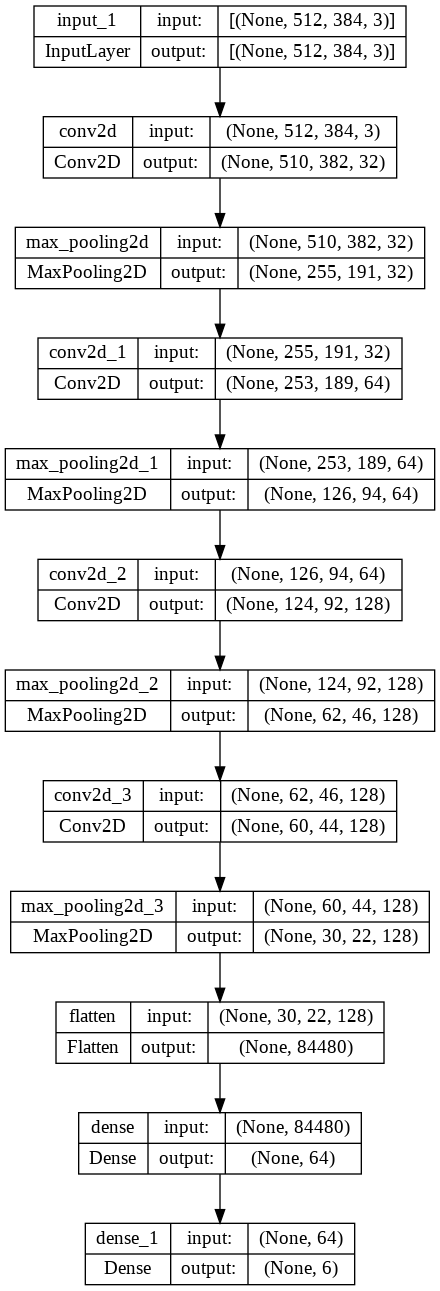

In [ ]:
plot_model(model, show_shapes = True)

In [ ]:
# define parameters
batch_size = 32
num_epochs = 100

# train & test steps
step_size_train = train_generator.n//train_generator.batch_size
step_size_test = test_generator.n//test_generator.batch_size

In [ ]:
history = model.fit(
    train_generator, epochs = num_epochs, steps_per_epoch = step_size_train,
    validation_data = test_generator, validation_steps = step_size_test
    )

Epoch 1/100
71/71 [==============================] - 317s 4s/step - loss: 1.5496 - accuracy: 0.3373 - val_loss: 1.4693 - val_accuracy: 0.4018
Epoch 2/100
71/71 [==============================] - 95s 1s/step - loss: 1.4047 - accuracy: 0.4238 - val_loss: 1.4349 - val_accuracy: 0.4330
Epoch 3/100
71/71 [==============================] - 94s 1s/step - loss: 1.3538 - accuracy: 0.4354 - val_loss: 1.3794 - val_accuracy: 0.3973
Epoch 4/100
71/71 [==============================] - 94s 1s/step - loss: 1.2890 - accuracy: 0.4817 - val_loss: 1.3120 - val_accuracy: 0.5089
Epoch 5/100
71/71 [==============================] - 94s 1s/step - loss: 1.1766 - accuracy: 0.5414 - val_loss: 1.2130 - val_accuracy: 0.5000
Epoch 6/100
71/71 [==============================] - 93s 1s/step - loss: 1.2013 - accuracy: 0.5316 - val_loss: 1.2216 - val_accuracy: 0.4777
Epoch 7/100
71/71 [==============================] - 93s 1s/step - loss: 1.0701 - accuracy: 0.5989 - val_loss: 1.2405 - val_accuracy: 0.5804
Epoch 8/100


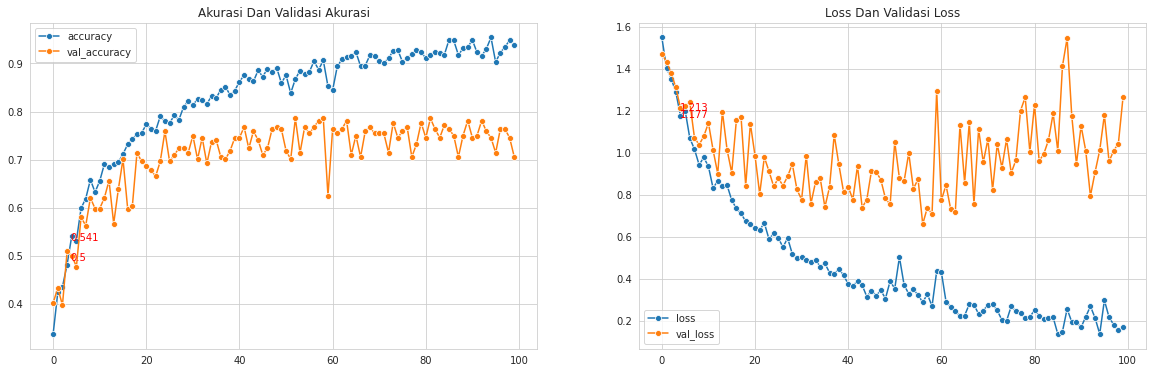

In [ ]:
sns.set_style(style = 'whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(20,6))
graph = ['accuracy', 'loss']
title = ["Akurasi dan Validasi Akurasi", "Loss dan Validasi Loss"]

def draw_graph(i, text, title):
    axes[i].set_title(title)
    fig = sns.lineplot(ax = axes[i], x = history.epoch, y = history.history[text], marker = 'o')
    fig = sns.lineplot(ax = axes[i], x = history.epoch, y = history.history[f'val_{text}'], marker = 'o')
    axes[i].legend([text, f'val_{text}'])

def text_graph(i, text):
    for j, (x, y) in enumerate(zip(history.epoch, history.history[f'{text}'])):
        if j == 4:
          axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red') 
    
    for j, (x, y) in enumerate(zip(history.epoch, history.history[f'val_{text}'])):
        if j == 4:
          axes[i].text(x = x - 0.2, y = y - 0.009, s = round(y, 3), color = 'red') 

for i, (val, tit) in enumerate(zip(graph, title)):
    draw_graph(i, val, tit)
    text_graph(i, val)

In [ ]:
# save & load model
model.save(file_dir + 'model/BaseCNN.h5')
model = load_model(file_dir + 'model/BaseCNN.h5')

In [ ]:
# train evaluation
train_eval = model.evaluate(train_generator)
for name, value in zip(model.metrics_names, train_eval):
  print(name, ':', round(value, 5))
print()

72/72 [==============================] - 828s 12s/step - loss: 0.2161 - accuracy: 0.9200
loss : 0.21611
accuracy : 0.92004



In [ ]:
# test evaluation
test_eval = model.evaluate(test_generator)
for name, value in zip(model.metrics_names, test_eval):
  print(name, ':', round(value, 5))
print()

8/8 [==============================] - 70s 9s/step - loss: 1.1450 - accuracy: 0.7251
loss : 1.14496
accuracy : 0.7251

